In [1]:

import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
#https://www.kaggle.com/sgus1318/titanic-analysis-learning-to-swim-with-python

import pandas as pd
train = pd.read_csv("Titanic/train.csv")


In [3]:
# to see the stats use describe
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train[['Survived','Pclass']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


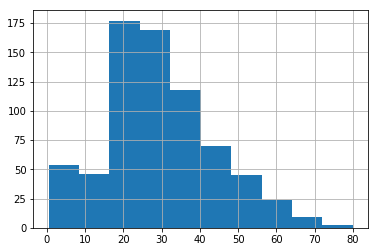

In [13]:

train['Age'].hist()

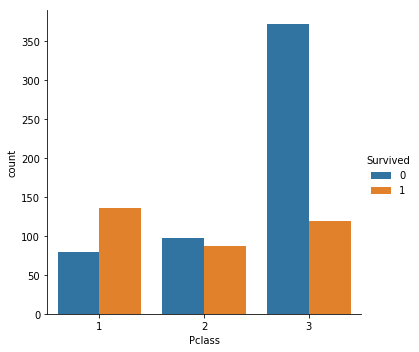

In [12]:
import seaborn as sb
sb.catplot(x='Pclass', kind='count', hue='Survived' , data=train)

In [5]:
# to check the null value use below function
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Age')]

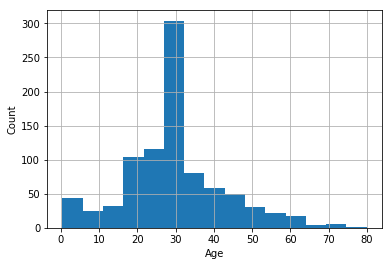

In [9]:
# simple histogram from panda dataframe
ax = train['Age'].hist(bins=15)
ax.set(xlabel='Age', ylabel='Count')


In [6]:
# check the median value by skipping NA
train['Age'].median(skipna=True)

28.0

In [7]:
# replacing null value 
# replace NA with median of 28
train['Age'].fillna(value=28,inplace=True)   # need to use function inplace to replace the values
train['Embarked'].fillna(value='S',inplace=True)  # just fill embarked point with Southampton as default

In [8]:
# now drop the cabin field as this is useless column
train = train.drop('Cabin',axis=1)

# if you want to drop more than one use below code
#train.drop(['Name','Sex'], axis=1)
#train.head(5)

In [9]:
# count the numbers in each value
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [24]:
x = train
x = x.drop('Survived', axis =1 )


In [26]:
y = train['Survived']

In [27]:
# split the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.25, random_state=42)



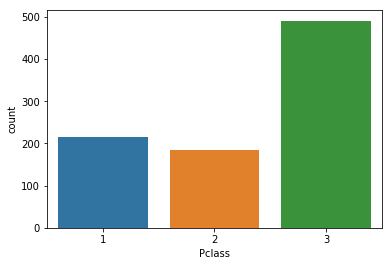

In [13]:
# you can use seaborn to do count
import seaborn as sb
sb.countplot('Pclass',data=train)

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [17]:
train['Embarked'] = train['Embarked'].map({'C':0, 'Q':1, 'S':2}) 
train['Sex'] = train['Sex'].map({'male':0, 'female':1}) 


In [29]:
features = ['Pclass','Age','Sex']


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2


In [30]:
from sklearn import tree
x = x_train[features]
y = y_train

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)


In [31]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
y_predict = clf.predict(x_test[features])

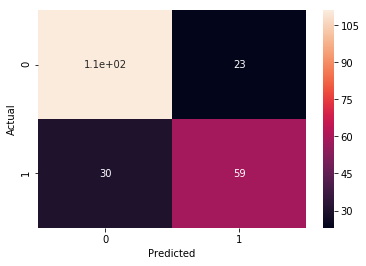

In [34]:
import pandas as pd
import seaborn as sn

data = {'y_Predicted': y_predict,
        'y_Actual': y_test
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)




In [41]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = y_predict
target_names = ['Died','Survived']
print(classification_report(y_true,y_pred,target_names = target_names))

              precision    recall  f1-score   support

        Died       0.79      0.83      0.81       134
    Survived       0.72      0.66      0.69        89

    accuracy                           0.76       223
   macro avg       0.75      0.75      0.75       223
weighted avg       0.76      0.76      0.76       223



In [58]:
# explanation on the above, used survived as an example (value = 1)

print ('precion logic >>',round(59/(23+59),2))
print ('recall logic >>',round(59/(30+59),2))
print ('accuracy logic >>',round((111+59)/223,2))

((134-23) + 59)/223     # total died = 134 ..... less 23 (see above box)




precion logic >> 0.72
recall logic >> 0.66
accuracy logic >> 0.76


0.7623318385650224

In [64]:
import pandas as pd
from pandas_ml import ConfusionMatrix

data = {'y_Predicted': y_predict,
        'y_Actual': y_test
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
Confusion_Matrix = ConfusionMatrix(df['y_Actual'], df['y_Predicted'])
Confusion_Matrix.print_stats()



population: 223
P: 89
N: 134
PositiveTest: 82
NegativeTest: 141
TP: 59
TN: 111
FP: 23
FN: 30
TPR: 0.6629213483146067
TNR: 0.8283582089552238
PPV: 0.7195121951219512
NPV: 0.7872340425531915
FPR: 0.17164179104477612
FDR: 0.2804878048780488
FNR: 0.33707865168539325
ACC: 0.7623318385650224
F1_score: 0.6900584795321637
MCC: 0.4989529710235189
informedness: 0.4912795572698305
markedness: 0.5067462376751428
prevalence: 0.3991031390134529
LRP: 3.8622374206155348
LRN: 0.4069237777102946
DOR: 9.491304347826086
FOR: 0.2127659574468085


NameError: name 'binary_confusion_matrix' is not defined

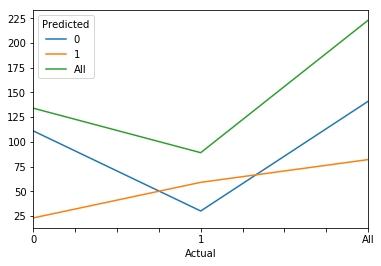

In [66]:

%matplotlib inline
import matplotlib.pyplot as plt

confusion_matrix.plot()

binary_confusion_matrix.plot(backend='seaborn')
cm = ConfusionMatrix(y_test, y_predict)
cm.print_stats()



In [31]:
train["Pclass"].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [56]:
train.dtypes

PassengerId       int64
Survived          int64
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [1]:
>>> from sklearn.datasets import load_iris
>>> from sklearn import tree

In [2]:
>>> clf = tree.DecisionTreeClassifier(random_state=0)
>>> iris = load_iris()

In [3]:
>>> clf = clf.fit(iris.data, iris.target)
>>> tree.plot_tree(clf)  

[Text(248.0, 338.79999999999995, 'X[3] <= 0.8\nentropy = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(209.84615384615384, 277.2, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(286.15384615384613, 277.2, 'X[3] <= 1.75\nentropy = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(152.6153846153846, 215.59999999999997, 'X[2] <= 4.95\nentropy = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(76.3076923076923, 154.0, 'X[3] <= 1.65\nentropy = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(38.15384615384615, 92.39999999999998, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(114.46153846153845, 92.39999999999998, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(228.9230769230769, 154.0, 'X[3] <= 1.55\nentropy = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(190.76923076923077, 92.39999999999998, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.0769230769231, 92.39999999999998, 'X[2] <= 5.45\nentropy = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text

Automatically created module for IPython interactive environment


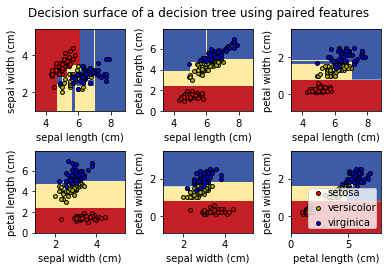

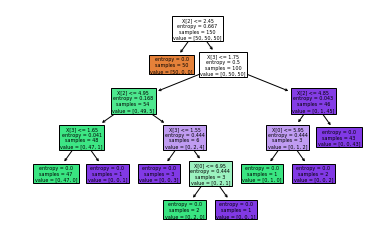

In [4]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Limit max depth
model = RandomForestClassifier(max_depth = 3, n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator_limited = model.estimators_[5]
estimator_limited

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=141289839, splitter='best')

In [16]:
# No max depth
model = RandomForestClassifier(max_depth = None, n_estimators=10)
model.fit(iris.data, iris.target)
estimator_nonlimited = model.estimators_[5]

In [17]:
from sklearn.tree import export_graphviz
export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, precision = 2, filled = True)

In [18]:
export_graphviz(estimator_nonlimited, out_file='tree_nonlimited.dot', feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, precision = 2, filled = True)

In [19]:
!dot -Tpng tree_limited.dot -o tree_limited.png -Gdpi=100

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [20]:
from IPython.display import Image
Image(filename = 'tree_limited.png')

FileNotFoundError: [Errno 2] No such file or directory: 'tree_limited.png'

In [23]:
from graphviz import Digraph


In [24]:
dot = Digraph(comment='The Round Table')


In [27]:
dot 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH